# Python for Finance – Algorithmic Trading Tutorial for Beginners

https://www.freecodecamp.org/news/algorithmic-trading-in-python/

In [1]:
import nasdaqdatalink
import pandas as pd
import quandl as q

print('done')

done


In [2]:
# Path of the file to read
subdirectory = "data"
filename = "MSFT.csv"

# Construct the full file path
file_path = os.path.join(subdirectory, filename)

msft_data = pd.read_csv(
    file_path,
    index_col='Date',
    parse_dates=['Date'],
)

print('done')

<IPython.core.display.Javascript object>

done


In [3]:
msft_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-08-17,24.709999,24.959999,24.600000,24.709999,19.054108,52912600
2010-08-18,24.680000,24.950001,24.410000,24.820000,19.138931,46818900
2010-08-19,24.620001,24.740000,24.209999,24.440001,18.845917,54064600
2010-08-20,24.309999,24.400000,24.200001,24.230000,18.683971,49560100
2010-08-23,24.440001,24.639999,24.240000,24.280001,18.722536,51643000


In [4]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-08-17 to 2023-08-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3272 non-null   float64
 1   High       3272 non-null   float64
 2   Low        3272 non-null   float64
 3   Close      3272 non-null   float64
 4   Adj Close  3272 non-null   float64
 5   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


# resample()
Pandas’ resample() method is used to facilitate control and flexibility on the frequency conversion of the time series data. We can specify the time intervals to resample the data to monthly, quarterly, or yearly, and perform the required operation over it.

This is an interesting way to analyze stock performance in different timeframes.

In [5]:
msft_data.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-08-31,24.196364,24.365454,23.977273,24.134545,18.610373,5.368172e+07
2010-09-30,24.598095,24.787143,24.386191,24.594762,18.965252,6.062569e+07
2010-10-31,25.140953,25.338572,24.899524,25.181905,19.418003,6.102061e+07
2010-11-30,26.251428,26.500476,26.003333,26.198095,20.259120,6.481792e+07
2010-12-31,27.420455,27.677727,27.315909,27.550000,21.374595,4.698682e+07
...,...,...,...,...,...,...
2023-04-30,287.851580,290.888423,285.314214,288.641052,287.402944,2.902616e+07
2023-05-31,314.151818,316.852271,311.799998,314.510454,313.479926,2.730942e+07
2023-06-30,334.017139,337.737142,331.333811,334.661428,333.954372,2.607565e+07


# Calculating returns
A financial return is simply the money made or lost on an investment. A return can be expressed nominally as the change in the amount of an investment over time. It can be calculated as the percentage derived from the ratio of profit to investment.

We have the pct_change() at our disposal for this purpose. Here is how you can calculate returns:

In [6]:
# Import numpy package
import numpy as np

# assign `Adj Close` to `daily_close`
daily_close = msft_data[['Adj Close']]

# returns as fractional change
daily_return = daily_close.pct_change()

# replacing NA values with 0
daily_return.fillna(0, inplace=True)

print(daily_return)

            Adj Close
Date                 
2010-08-17   0.000000
2010-08-18   0.004452
2010-08-19  -0.015310
2010-08-20  -0.008593
2010-08-23   0.002064
...               ...
2023-08-10   0.002172
2023-08-11  -0.005946
2023-08-14   0.009439
2023-08-15  -0.006728
2023-08-16  -0.002428

[3272 rows x 1 columns]


This will print the returns that the stock has been generating on a daily basis. Multiplying the number by 100 will give you the percentage change.

The formula used in pct_change() is:

Return = {(Price at t) — (Price at t-1)} / {Price at t-1}
Now, to calculate monthly returns, all you need to do is:

In [7]:
mdata = msft_data.resample('M').apply(lambda x: x[-1])

monthly_return = mdata.pct_change()
monthly_return

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-08-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-30,0.042797,0.046355,0.044597,0.043460,0.043461,-0.072825
2010-10-31,0.103210,0.095449,0.087028,0.089016,0.089016,0.863992
2010-11-30,-0.077348,-0.063603,-0.055891,-0.052868,-0.047049,-0.340748
2010-12-31,0.109780,0.096192,0.105200,0.104909,0.104909,-0.671210
...,...,...,...,...,...,...
2023-04-30,0.071476,0.067964,0.071767,0.065765,0.065765,0.112333
2023-05-31,0.093023,0.087431,0.079193,0.068769,0.071105,0.260762
2023-06-30,0.016431,0.020212,0.030153,0.036999,0.036999,-0.416247


After resampling the data to months (for business days), we can get the last day of trading in the month using the apply() function.

apply() takes in a function and applies it to each and every row of the Pandas series. The lambda function is an anonymous function in Python which can be defined without a name, and only takes expressions in the following format:

Lambda: expression

For example, lambda x: x * 2 is a lambda function. Here, x is the argument and x * 2 is the expression that gets evaluated and returned.

# Moving Averages in Trading
The concept of moving averages is going to build the base for our momentum-based trading strategy.

In finance, analysts often have to evaluate statistical metrics continually over a sliding window of time, which is called moving window calculations.

Let’s see how we can calculate the rolling mean over a window of 50 days, and slide the window by 1 day.

## rolling()
This is the magical function which does the tricks for us:

In [8]:
# assigning adjusted closing prices to 
adj_price = msft_data['Adj Close']

# calculate the moving average
mav = adj_price.rolling(window=50).mean()

# print the result
print(mav[-10:])

Date
2023-08-03    335.285125
2023-08-04    335.534996
2023-08-07    335.859509
2023-08-08    335.862103
2023-08-09    335.649353
2023-08-10    335.484103
2023-08-11    335.336815
2023-08-14    335.166376
2023-08-15    334.896148
2023-08-16    334.599543
Name: Adj Close, dtype: float64


You’ll see the rolling mean over a window of 50 days (approx. 2 months). Moving averages help smooth out any fluctuations or spikes in the data, and give you a smoother curve for the performance of the company.

We can plot and see the difference:

<AxesSubplot:xlabel='Date'>

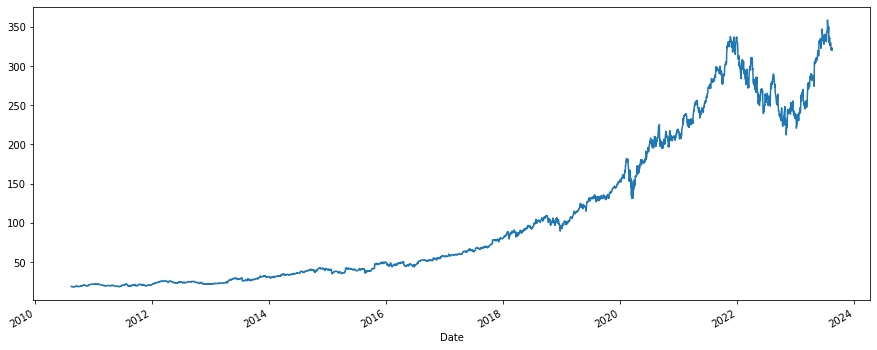

In [9]:
# import the matplotlib package to see the plot

import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))

adj_price.plot()

You can now plot the rolling mean():

<AxesSubplot:xlabel='Date'>

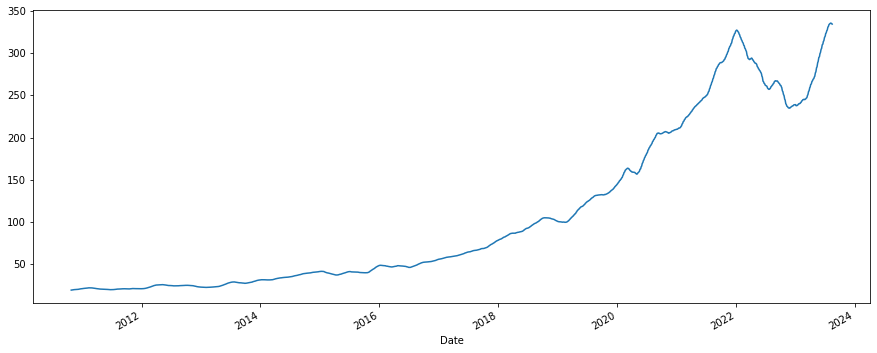

In [10]:
plt.figure(figsize=(15,6))
mav.plot()

And you can see the difference for yourself, how the spikes in the data are consumed to give a general sentiment around the performance of the stock.

# Formulating a Trading Strategy
This will be a step-by-step guide to developing a momentum-based Simple Moving Average Crossover (SMAC) strategy.

In [11]:
# step1: initialize the short and long lookback periods
short_lb = 50
long_lb = 120

In [12]:
# step2: initialize a new DataFrame called signal_df with a signal column
signal_df = pd.DataFrame(index=msft_data.index)
signal_df['signal'] = 0.0
signal_df

,signal
Date,
2010-08-17,0.0
2010-08-18,0.0
2010-08-19,0.0
2010-08-20,0.0
2010-08-23,0.0
...,...
2023-08-10,0.0
2023-08-11,0.0
2023-08-14,0.0


In [13]:
# step3: create a short simple moving average over the short lookback period
signal_df['short_mav'] = msft_data['Adj Close'].rolling(window=short_lb, min_periods=1, center=False).mean()

In [14]:
# step4: create long simple moving average over the long lookback period
signal_df['long_mav'] = msft_data['Adj Close'].rolling(window=long_lb, min_periods=1, center=False).mean()
signal_df

,signal,short_mav,long_mav
Date,,,
2010-08-17,0.0,19.054108,19.054108
2010-08-18,0.0,19.096519,19.096519
2010-08-19,0.0,19.012985,19.012985
2010-08-20,0.0,18.930732,18.930732
2010-08-23,0.0,18.889093,18.889093
...,...,...,...
2023-08-10,0.0,335.484103,305.589357
2023-08-11,0.0,335.336815,306.117514
2023-08-14,0.0,335.166376,306.715590


In [15]:
# step5: generate the signals based on the conditional statement
signal_df['signal'][short_lb:] = np.where(signal_df['short_mav'][short_lb:] > signal_df['long_mav'][short_lb:], 1.0, 0.0)  
signal_df

,signal,short_mav,long_mav
Date,,,
2010-08-17,0.0,19.054108,19.054108
2010-08-18,0.0,19.096519,19.096519
2010-08-19,0.0,19.012985,19.012985
2010-08-20,0.0,18.930732,18.930732
2010-08-23,0.0,18.889093,18.889093
...,...,...,...
2023-08-10,1.0,335.484103,305.589357
2023-08-11,1.0,335.336815,306.117514
2023-08-14,1.0,335.166376,306.715590


In [16]:
# step6: create the trading orders based on the positions column
signal_df['positions'] = signal_df['signal'].diff()
signal_df[signal_df['positions'] == -1.0]

,signal,short_mav,long_mav,positions
Date,,,,
2011-03-31,0.0,20.766199,20.773649,-1.0
2012-06-21,0.0,24.427284,24.436809,-1.0
2012-11-14,0.0,24.094276,24.130644,-1.0
2013-09-19,0.0,27.307048,27.326951,-1.0
2015-02-09,0.0,39.921621,39.936886,-1.0
2015-09-18,0.0,39.779051,39.799841,-1.0
2016-03-21,0.0,46.487677,46.528246,-1.0
2016-06-10,0.0,47.147954,47.175064,-1.0
2018-12-17,0.0,102.222991,102.355769,-1.0


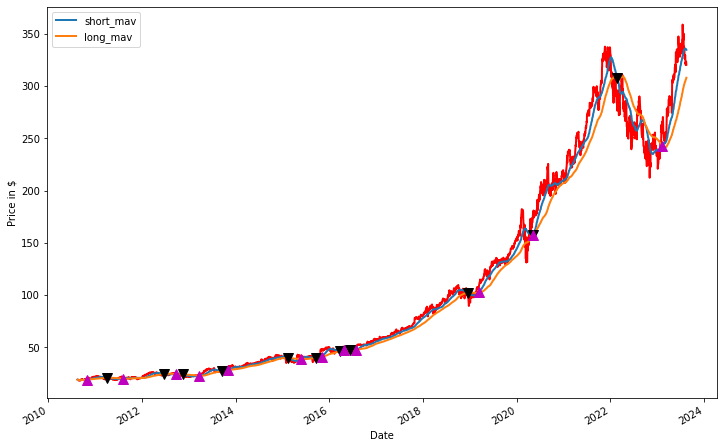

In [21]:
# initialize the plot using plt
fig = plt.figure()

# Add a subplot and label for y-axis

plt1 = fig.add_subplot(111,  ylabel='Price in $')

msft_data['Adj Close'].plot(ax=plt1, color='r', lw=2.)

# plot the short and long lookback moving averages
signal_df[['short_mav', 'long_mav']].plot(ax=plt1, lw=2., figsize=(12,8))

# plotting the sell signals
plt1.plot(signal_df.loc[signal_df.positions == -1.0].index, signal_df.short_mav[signal_df.positions == -1.0],'v', markersize=10, color='k') 

# plotting the buy signals
plt1.plot(signal_df.loc[signal_df.positions == 1.0].index, signal_df.short_mav[signal_df.positions == 1.0], '^', markersize=10, color='m')

# Show the plot
plt.show()

We have created a new DataFrame which is designed to capture the signals. These signals are being generated whenever the short moving average crosses the long moving average using the np.where. It assigns 1.0 for true and 0.0 if the condition comes out to be false.

The positions columns in the DataFrame tells us if there is a buy signal or a sell signal, or to stay put. We're basically calculating the difference in the signals column from the previous row using diff.